# *Crime Data in Los Angeles 2020 Till July 2023: Exploratory Data Analysis* 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
#graphs show automatically

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')
#sets style to seaborn

## Load Data

In [2]:
#load the dataset to work with and view the top rows
df_crime = pd.read_csv("data/Crime_Data_from_2020_to_Present.csv", index_col=None, header=0)
df_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
#show the last 3 rows of the data
df_crime.tail(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
761579,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
761580,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,1822 0344,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
761581,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


## Data Understanding and Preparation

In [4]:
#show the properties and records of df_crime
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761582 entries, 0 to 761581
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           761582 non-null  int64  
 1   Date Rptd       761582 non-null  object 
 2   DATE OCC        761582 non-null  object 
 3   TIME OCC        761582 non-null  int64  
 4   AREA            761582 non-null  int64  
 5   AREA NAME       761582 non-null  object 
 6   Rpt Dist No     761582 non-null  int64  
 7   Part 1-2        761582 non-null  int64  
 8   Crm Cd          761582 non-null  int64  
 9   Crm Cd Desc     761582 non-null  object 
 10  Mocodes         657013 non-null  object 
 11  Vict Age        761582 non-null  int64  
 12  Vict Sex        662009 non-null  object 
 13  Vict Descent    662003 non-null  object 
 14  Premis Cd       761573 non-null  float64
 15  Premis Desc     761138 non-null  object 
 16  Weapon Used Cd  264752 non-null  float64
 17  Weapon Des

In [5]:
#a look at the number of null values in each field
df_crime.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           104569
Vict Age               0
Vict Sex           99573
Vict Descent       99579
Premis Cd              9
Premis Desc          444
Weapon Used Cd    496830
Weapon Desc       496830
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          705240
Crm Cd 3          759707
Crm Cd 4          761525
LOCATION               0
Cross Street      639191
LAT                    0
LON                    0
dtype: int64

In [6]:
#drop some irrelevant columns
df_crime.drop(['Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street','Mocodes', 'Premis Cd'], axis=1, inplace=True)

In [7]:
#rename the columns 
df_crime.rename(columns=lambda x: x.title(),inplace=True)

df_crime.rename({'Date Rptd':'Date Reported', 'Date Occ':'Date Occured',\
                'Time Occ': 'Time Occured', 'Rpt Dist No':'Reporting District No',\
                 'Crm Cd':'Crime Committed', 'Crm Cd Desc':'Crime Committed Description',\
                 'Vict Age':'Victim Age', 'Vict Sex':'Victim Sex',\
                 'Vict Descent':'Victim Descent',\
                 'Premis Desc':'Premise Description','Weapon Used Cd':'Weapon Used Committed',\
                 'Weapon Desc':'Weapon Description','Status Desc':'Status Description',\
                 'Lat':'Latitude', 'Lon':'Longitude', 'Dr_No':'Division of Records Number'}, axis=1, inplace=True)

In [8]:
#convert some fields appropriately, to datetime precisely
df_crime['Date Reported'] = pd.to_datetime(df_crime['Date Reported'])
df_crime['Date Occured'] = pd.to_datetime(df_crime['Date Occured'])

In [9]:
#Date Reported transformed to day,month and year
df_crime['Day Reported'] = df_crime['Date Reported'].dt.dayofweek
df_crime['Month Reported'] = df_crime['Date Reported'].dt.month
df_crime['Year Reported'] = df_crime['Date Reported'].dt.year

In [10]:
#Date Occured transformed to day,month and year
df_crime['Day Occured'] = df_crime['Date Occured'].dt.dayofweek
df_crime['Month Occured'] = df_crime['Date Occured'].dt.month
df_crime['Year Occured'] = df_crime['Date Occured'].dt.year

In [11]:
#a look at the data for better understanding
display(df_crime.head())
df_crime.info()

,Division of Records Number,Date Reported,Date Occured,Time Occured,Area,Area Name,Reporting District No,Part 1-2,Crime Committed,Crime Committed Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Weapon Used Committed,Weapon Description,Status,Status Description,Location,Latitude,Longitude,Day Reported,Month Reported,Year Reported,Day Occured,Month Occured,Year Occured
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978,2,1,2020,2,1,2020
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545,3,1,2020,2,1,2020
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,1,4,2020,3,2,2020
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,2,1,2020,2,1,2020
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468,2,1,2020,2,1,2020


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761582 entries, 0 to 761581
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Division of Records Number   761582 non-null  int64         
 1   Date Reported                761582 non-null  datetime64[ns]
 2   Date Occured                 761582 non-null  datetime64[ns]
 3   Time Occured                 761582 non-null  int64         
 4   Area                         761582 non-null  int64         
 5   Area Name                    761582 non-null  object        
 6   Reporting District No        761582 non-null  int64         
 7   Part 1-2                     761582 non-null  int64         
 8   Crime Committed              761582 non-null  int64         
 9   Crime Committed Description  761582 non-null  object        
 10  Victim Age                   761582 non-null  int64         
 11  Victim Sex                

In [12]:
#Month and Day Reported renamed appropriately
df_crime['Month Reported'] = df_crime['Month Reported'].replace({1.0:'January',
                                            2.0:'February',
                                            3.0:'March',
                                            4.0:'April',
                                            5.0:'May',
                                            6.0:'June',
                                            7.0:'July',
                                            8.0:'August',
                                            9.0:'September',
                                            10.0:'October',
                                            11.0:'November',
                                            12.0:'December'})

df_crime['Day Reported'] = df_crime['Day Reported'].replace({0:'Monday',
                                                    1:'Tuesday',
                                                    2:'Wednesday',
                                                    3:'Thursday',
                                                    4:'Friday',
                                                    5:'Saturday',
                                                    6:'Sunday'})

In [13]:
#Month and Day Occured renamed appropriately
df_crime['Month Occured'] = df_crime['Month Occured'].replace({1.0:'January',
                                            2.0:'February',
                                            3.0:'March',
                                            4.0:'April',
                                            5.0:'May',
                                            6.0:'June',
                                            7.0:'July',
                                            8.0:'August',
                                            9.0:'September',
                                            10.0:'October',
                                            11.0:'November',
                                            12.0:'December'})

df_crime['Day Occured'] = df_crime['Day Occured'].replace({0:'Monday',
                                                    1:'Tuesday',
                                                    2:'Wednesday',
                                                    3:'Thursday',
                                                    4:'Friday',
                                                    5:'Saturday',
                                                    6:'Sunday'})

In [14]:
#function to appropriately rename the "Time Occured" field
def convert_to_time_format(time_int):
    time_str = str(time_int).zfill(4)
    if len(time_str) not in [4, 3]:
        raise ValueError("Invalid time format. The input should be in 'HHMM' or 'HMM' format.")

    if len(time_str) == 3:
        hour = time_str[0]
        minute = time_str[1:]
    else:
        hour = time_str[:2]
        minute = time_str[2:]

    return f"{hour.zfill(2)}:{minute.zfill(2)}"

# Use apply to convert the "Time Occurred" column
df_crime["Time Occured"] = df_crime["Time Occured"].apply(convert_to_time_format)

In [15]:
df_crime['Victim Descent'].value_counts()

H    233935
W    156128
B    109245
X     72183
O     60284
A     16635
K      4053
F      3174
C      2864
J      1070
V       771
I       730
Z       370
P       207
U       157
D        53
G        51
L        47
S        44
-         2
Name: Victim Descent, dtype: int64

In [16]:
#rename Victim Descent field 
def victim_desc(a):
    if a['Victim Descent'] == 'A':
        return 'Asian'
    elif a['Victim Descent'] == 'B':
        return 'Black'
    elif a['Victim Descent'] == 'C':
        return 'Chinese'
    elif a['Victim Descent'] == 'D':
        return 'Cambodian'
    elif a['Victim Descent'] == 'F':
        return 'Filipino'
    elif a['Victim Descent'] == 'G':
        return 'Guamanian'
    elif a['Victim Descent'] == 'H':
        return 'Hispanic/Latin/Mexican'
    elif a['Victim Descent'] == 'I':
        return 'American Indian/Alaskan Native'
    elif a['Victim Descent'] == 'J':
        return 'Japanese'
    elif a['Victim Descent'] == 'K':
        return 'Korean'
    elif a['Victim Descent'] == 'L':
        return 'Laotian'
    elif a['Victim Descent'] == 'O':
        return 'Other'
    elif a['Victim Descent'] == 'P':
        return 'Pacific Islander'
    elif a['Victim Descent'] == 'S':
        return 'Samoan'
    elif a['Victim Descent'] == 'U':
        return 'Hawaiian'
    elif a['Victim Descent'] == 'V':
        return 'Vietnamese'
    elif a['Victim Descent'] == 'W':
        return 'White'
    elif a['Victim Descent'] == 'X':
        return 'Unknown'
    elif a['Victim Descent'] == 'Z':
        return 'Asian Indian'
    else:
        return 'N/A'
    
df_crime["Victim Descent"] = df_crime.apply(victim_desc, axis=1)

In [17]:
df_crime['Victim Descent'].value_counts()

Hispanic/Latin/Mexican            233935
White                             156128
Black                             109245
N/A                                99581
Unknown                            72183
Other                              60284
Asian                              16635
Korean                              4053
Filipino                            3174
Chinese                             2864
Japanese                            1070
Vietnamese                           771
American Indian/Alaskan Native       730
Asian Indian                         370
Pacific Islander                     207
Hawaiian                             157
Cambodian                             53
Guamanian                             51
Laotian                               47
Samoan                                44
Name: Victim Descent, dtype: int64

The '-' category in the Victim Descent column, before the function was applied, has been added to the null values data as 'N/A' in the function. I opted to go with 'N/A' not for any specific reason but because there already exists an 'Unknown' category in the field, which I did not want to repeat. 

In [18]:
def age_group(g):
    if g['Victim Age'] <= 12:
        return 'Children'
    elif g['Victim Age'] <= 19:
        return 'Teenagers'
    elif g['Victim Age'] <= 29:
        return 'Young Adults'
    elif g['Victim Age'] <= 39:
        return 'Adults'
    elif g['Victim Age'] <= 59:
        return 'Middle-Aged Adults'
    else:
        return 'Old'
    
df_crime["Victim Age Group"] = df_crime.apply(age_group, axis=1)

In [19]:
#some more irrelevant columns dropped
df_crime = df_crime.drop(['Date Reported','Date Occured'], axis=1)

In [20]:
#show the properties of df_crime
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761582 entries, 0 to 761581
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Division of Records Number   761582 non-null  int64  
 1   Time Occured                 761582 non-null  object 
 2   Area                         761582 non-null  int64  
 3   Area Name                    761582 non-null  object 
 4   Reporting District No        761582 non-null  int64  
 5   Part 1-2                     761582 non-null  int64  
 6   Crime Committed              761582 non-null  int64  
 7   Crime Committed Description  761582 non-null  object 
 8   Victim Age                   761582 non-null  int64  
 9   Victim Sex                   662009 non-null  object 
 10  Victim Descent               761582 non-null  object 
 11  Premise Description          761138 non-null  object 
 12  Weapon Used Committed        264752 non-null  float64
 13 

In [21]:
#rearrange the columns
df_crime = df_crime.iloc[:,[0,19,20,21,1,22,23,24,2,3,4,5,6,7,8,25,9,10,11,12,13,14,15,16,17,18]]
df_crime.head()

,Division of Records Number,Day Reported,Month Reported,Year Reported,Time Occured,Day Occured,Month Occured,Year Occured,Area,Area Name,Reporting District No,Part 1-2,Crime Committed,Crime Committed Description,Victim Age,Victim Age Group,Victim Sex,Victim Descent,Premise Description,Weapon Used Committed,Weapon Description,Status,Status Description,Location,Latitude,Longitude
0,10304468,Wednesday,January,2020,22:30,Wednesday,January,2020,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,Adults,F,Black,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,Thursday,January,2020,03:30,Wednesday,January,2020,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,Young Adults,M,Hispanic/Latin/Mexican,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,Tuesday,April,2020,12:00,Thursday,February,2020,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,Children,X,Unknown,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,Wednesday,January,2020,17:30,Wednesday,January,2020,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,Old,F,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,Wednesday,January,2020,04:15,Wednesday,January,2020,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,Adults,X,Unknown,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


## Exploratory Analysis

### Area with most crimes

#### What areas in Los Angeles have experienced high rates of incidents during this period?

In [22]:
df_crime_area = df_crime['Area Name'].value_counts()
df_crime_area = pd.DataFrame(df_crime_area).reset_index()
df_crime_area = df_crime_area.rename(columns={'index':'Area Name',
                                              'Area Name':'Number of Crime Occurence'})
df_crime_area = df_crime_area.head(10)
df_crime_area

,Area Name,Number of Crime Occurence
0,Central,51114
1,77th Street,48168
2,Pacific,44435
3,Southwest,42544
4,Hollywood,40523
5,Southeast,39023
6,Olympic,38624
7,Newton,37940
8,N Hollywood,37892
9,Wilshire,36008


These are the top 10 areas in Los Angeles that have been mostly affected or experienced high rates of incidents since 2020 till the period this analysis was reported. Central has been the affected the most, then follows by 77th Street and Pacific areas.

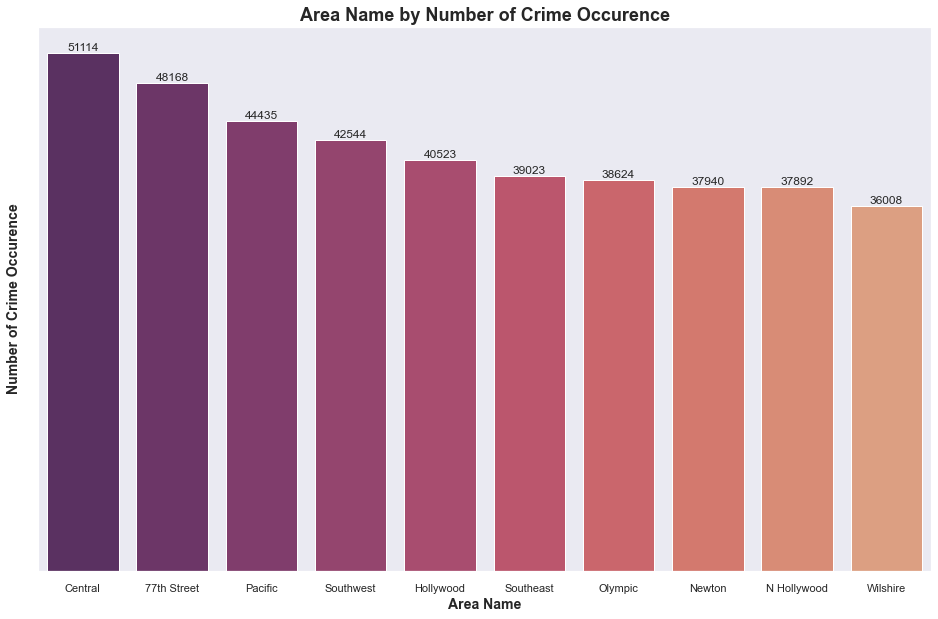

In [23]:
plt.figure(figsize=(16,10))
sns.set(style="dark")
sns.barplot(x='Area Name', y='Number of Crime Occurence', data=df_crime_area, palette='flare_r')
plt.title('Area Name by Number of Crime Occurence', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Area Name', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Number of Crime Occurence', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.gca().set_yticklabels([])
#insert data labels
for index, value in enumerate(df_crime_area['Number of Crime Occurence']):
    plt.text(index, value, str(value), ha='center', va='bottom')

The graph shows that Central is the area with the highest number of crimes in Los Angeles, with over 51,000 crimes committed in that area alone since 2020 

#### Let's proceed to further analyse what type of crimes were committed in Central the most.

In [24]:
crime_central = df_crime[df_crime['Area Name'] == 'Central']
crime_central = crime_central['Crime Committed Description'].value_counts()
crime_central = crime_central.head(5)
crime_central = pd.DataFrame(crime_central).reset_index().rename(columns={'index':'Crime Committed Description',
                                                                         'Crime Committed Description':'Number of Occurence'})
crime_central

,Crime Committed Description,Number of Occurence
0,BURGLARY FROM VEHICLE,7052
1,BATTERY - SIMPLE ASSAULT,5582
2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",3610
3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",3369
4,VEHICLE - STOLEN,3249


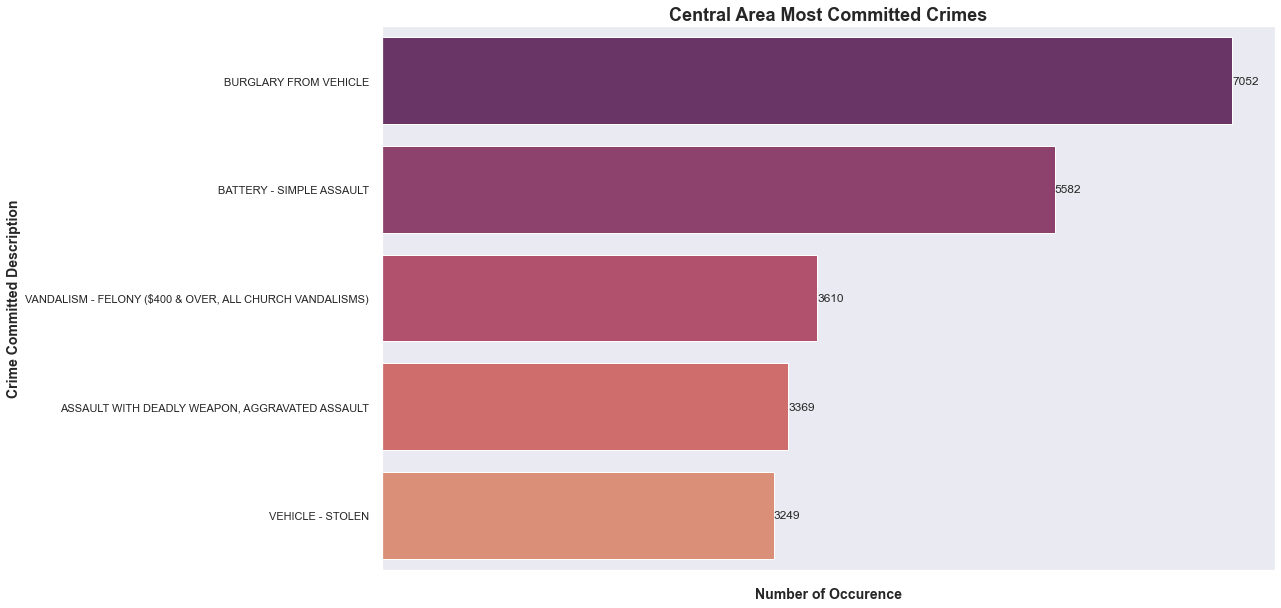

In [25]:
plt.figure(figsize=(16,10))
sns.set(style="dark")
ax = sns.barplot(x='Number of Occurence', y='Crime Committed Description', data=crime_central, palette='flare_r')
plt.title('Central Area Most Committed Crimes', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Number of Occurence', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Crime Committed Description', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.gca().set_xticklabels([]) #remove the x axis values
for index, value in enumerate(crime_central['Number of Occurence']):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=12)

These are the 5 prevalent crimes in Central area of Los Angeles, **burglary from vehicle** is the most committed crime in this area, with **battery - simple assault** being next.

### Month with most crimes

In [26]:
sort_month = ['January','February','March','April','May','June','July','August','September','October','November','December']

df_crime_month = df_crime['Month Occured'].value_counts()
df_crime_month = pd.DataFrame(df_crime_month, index=sort_month)
df_crime_month = pd.DataFrame(df_crime_month).reset_index()
df_crime_month = df_crime_month.rename(columns={'index':'Month',
                                              'Month Occured':'Number of Occurence'})
df_crime_month

,Month,Number of Occurence
0,January,72827
1,February,68484
2,March,70961
3,April,69956
4,May,72847
5,June,71925
6,July,64154
7,August,55214
8,September,53156
9,October,55946


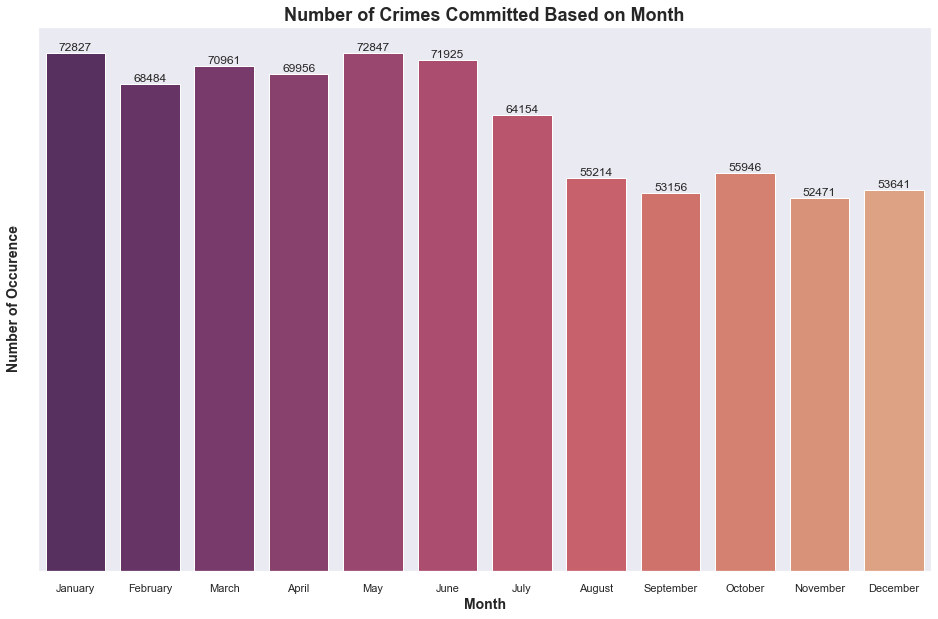

In [27]:
plt.figure(figsize=(16,10))
sns.set(style="dark")
sns.barplot(x='Month', y='Number of Occurence', data=df_crime_month, palette='flare_r')
plt.title('Number of Crimes Committed Based on Month', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Month', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Number of Occurence', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.gca().set_yticklabels([])
for index, value in enumerate(df_crime_month['Number of Occurence']):
    plt.text(index, value, str(value), ha='center', va='bottom')

Most crimes were committed in the month of May, followed closely by January. 

### Day with most crimes

In [28]:
sort_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df_crime_day = df_crime['Day Occured'].value_counts()
df_crime_day = pd.DataFrame(df_crime_day, index=sort_day)
df_crime_day = pd.DataFrame(df_crime_day).reset_index()
df_crime_day = df_crime_day.rename(columns={'index':'Day',
                                              'Day Occured':'Number of Occurence'})
df_crime_day

,Day,Number of Occurence
0,Monday,107980
1,Tuesday,104391
2,Wednesday,108400
3,Thursday,107400
4,Friday,116177
5,Saturday,111145
6,Sunday,106089


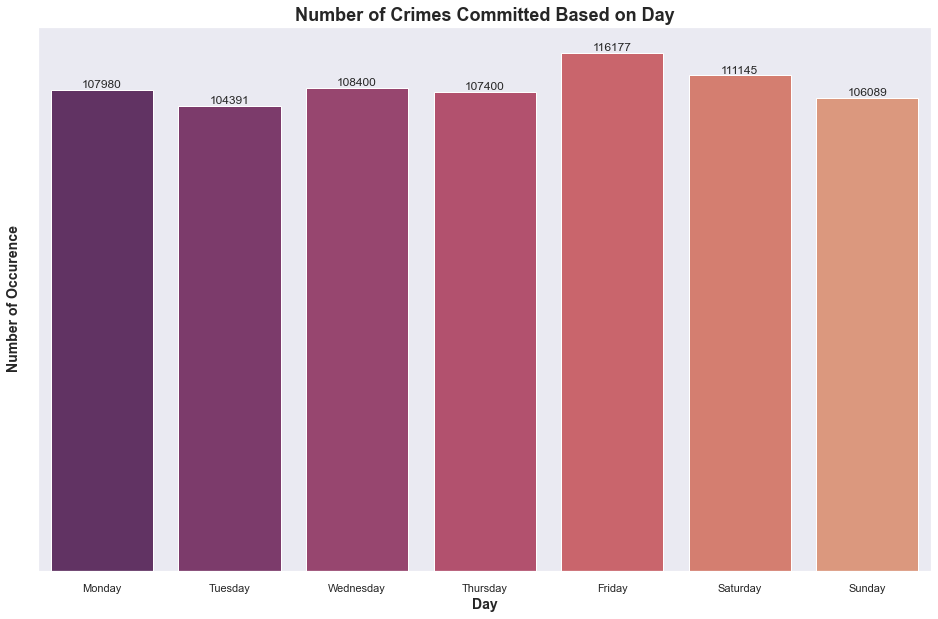

In [29]:
plt.figure(figsize=(16,10))
sns.barplot(x='Day', y='Number of Occurence', data=df_crime_day, palette='flare_r')
plt.title('Number of Crimes Committed Based on Day', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Day', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Number of Occurence', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.gca().set_yticklabels([])
for index, value in enumerate(df_crime_day['Number of Occurence']):
    plt.text(index, value, str(value), ha='center', va='bottom')

### What sex is the most targeted? 

In [30]:
df_crime_victimsex = df_crime['Victim Sex']
df_crime_victimsex = df_crime_victimsex.value_counts()
df_crime_victimsex = pd.DataFrame(df_crime_victimsex).reset_index()
df_crime_victimsex = df_crime_victimsex.rename(columns={'index':'Victim Sex',
                                              'Victim Sex':'Number of Occurence'})
df_crime_victimsex

,Victim Sex,Number of Occurence
0,M,315399
1,F,281376
2,X,65145
3,H,88
4,-,1


In [31]:
#the index row 4 has no real sex description
#opt to drop it
index_to_drop = 4
df_crime_victimsex = df_crime_victimsex.drop(index_to_drop)
df_crime_victimsex

,Victim Sex,Number of Occurence
0,M,315399
1,F,281376
2,X,65145
3,H,88


Text(0.5, 1.0, 'Percentage of Victims by Sex')

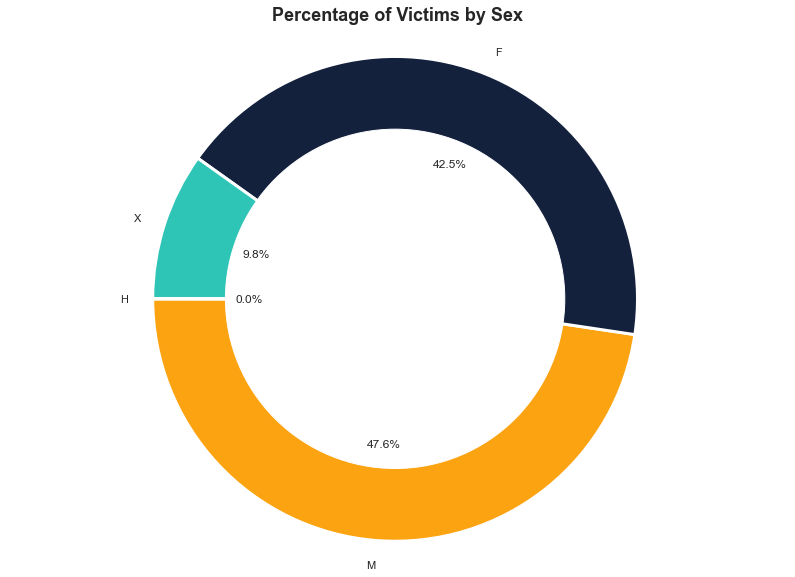

In [32]:
plt.figure(figsize=(14,10))
sns.set(style='dark')
custom_colors = ['#fca311', '#14213d', '#2ec4b6', '#9a8c98']
plt.pie(df_crime_victimsex['Number of Occurence'], wedgeprops = {'linewidth': 3}, labels=df_crime_victimsex['Victim Sex'], startangle=180, autopct='%1.1f%%', colors=custom_colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Percentage of Victims by Sex', fontweight='bold', fontsize=18, horizontalalignment='center')

Males ('M') were the most affected by crimes, accounting for 47.6% of the cases. Notably, the percentage of crimes involving the other category ('H') was negligible, with a value of 0.0% which resulted in no representation in the chart.

### What descent are being targeted the most within the period?

In [33]:
df_crime_descent = df_crime['Victim Descent'].value_counts()
df_crime_descent = pd.DataFrame(df_crime_descent).reset_index()
df_crime_descent = df_crime_descent.rename(columns={'index':'Victim Descent',
                                              'Victim Descent':'Number of Times Attacked'})
df_crime_descent

,Victim Descent,Number of Times Attacked
0,Hispanic/Latin/Mexican,233935
1,White,156128
2,Black,109245
3,N/A,99581
4,Unknown,72183
5,Other,60284
6,Asian,16635
7,Korean,4053
8,Filipino,3174
9,Chinese,2864


In [34]:
#recall that the N/A comprises the null values and '-'
#opt to drop the N/A and unknown categories since they have no meaningful insights in this context 
index_to_drop = [3,4]
df_crime_descent = df_crime_descent.drop(index_to_drop)
df_crime_descent = df_crime_descent.head(10).reset_index()
df_crime_descent = df_crime_descent.drop('index', axis=1)
df_crime_descent

,Victim Descent,Number of Times Attacked
0,Hispanic/Latin/Mexican,233935
1,White,156128
2,Black,109245
3,Other,60284
4,Asian,16635
5,Korean,4053
6,Filipino,3174
7,Chinese,2864
8,Japanese,1070
9,Vietnamese,771


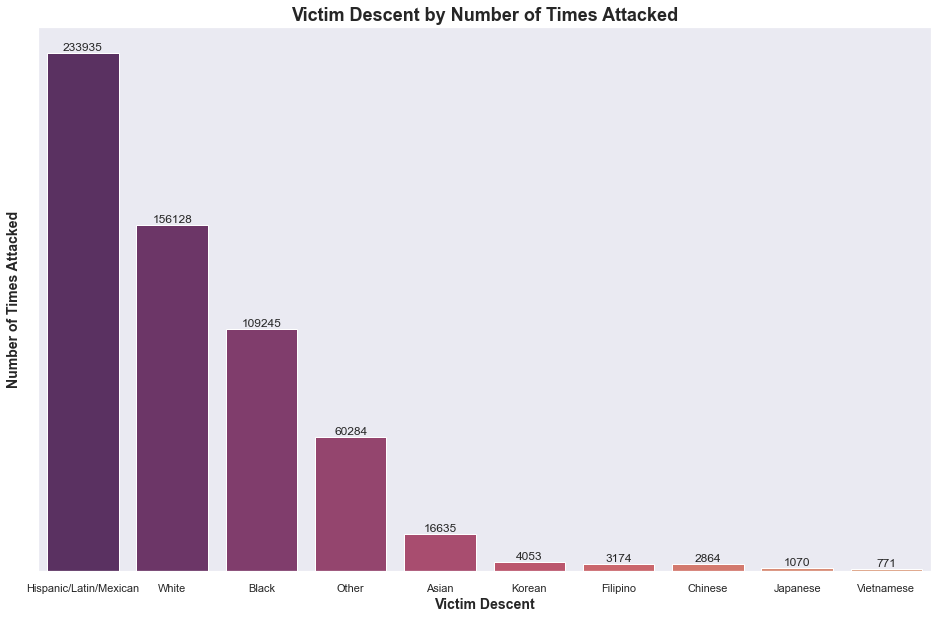

In [35]:
plt.figure(figsize=(16,10))
sns.barplot(x='Victim Descent', y='Number of Times Attacked', data=df_crime_descent, palette='flare_r')
plt.title('Victim Descent by Number of Times Attacked', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Victim Descent', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Number of Times Attacked', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.gca().set_yticklabels([])
for index, value in enumerate(df_crime_descent['Number of Times Attacked']):
    plt.text(index, value, str(value), ha='center', va='bottom')

The Hispanic/Latin/Mexican descent are the major victim.

### What age group is being targeted the most?

In [36]:
sort_agegroup = ['Children','Teenagers','Young Adults','Adults','Middle-Aged Adults','Old']

df_crime_age = df_crime['Victim Age Group'].value_counts()
df_crime_age = pd.DataFrame(df_crime_age, index=sort_agegroup)
df_crime_age = pd.DataFrame(df_crime_age).reset_index()
df_crime_age = df_crime_age.rename(columns={'index':'Victim Age Group',
                                              'Victim Age Group':'Number of Times Attacked'})
df_crime_age

,Victim Age Group,Number of Times Attacked
0,Children,192667
1,Teenagers,26330
2,Young Adults,139187
3,Adults,151920
4,Middle-Aged Adults,180301
5,Old,71177


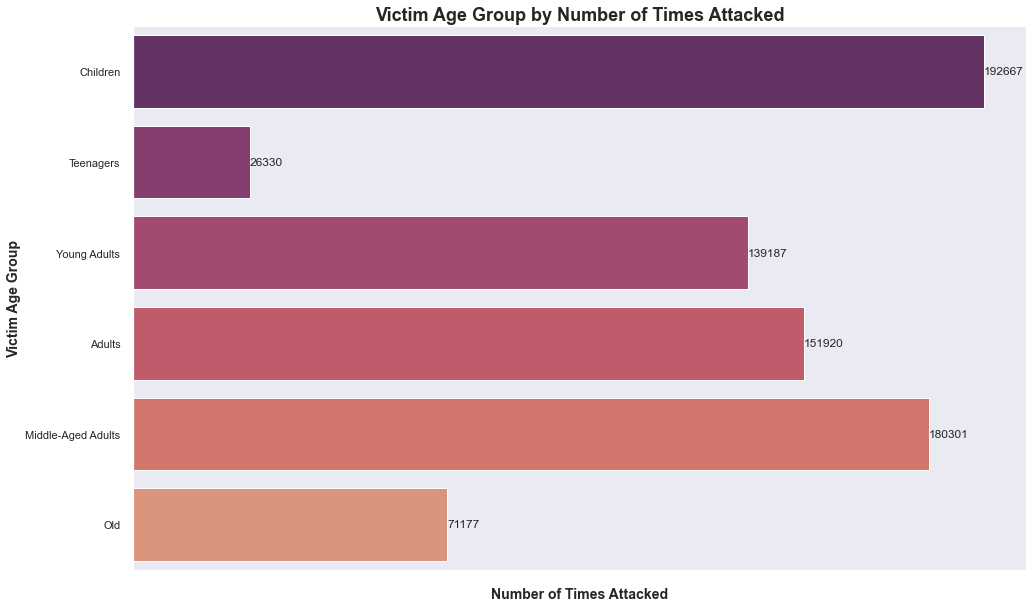

In [37]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x='Number of Times Attacked', y='Victim Age Group', data=df_crime_age, palette='flare_r')
plt.title('Victim Age Group by Number of Times Attacked', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Number of Times Attacked', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Victim Age Group', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.gca().set_xticklabels([])
for index, value in enumerate(df_crime_age['Number of Times Attacked']):
    ax.text(value, index, str(value), ha='left', va='center')

Children (those that fall between the age bracket of 0 and 12) are the major victim in this analysis.

### The weapons mostly used by the attackers

#### Interested in knowing what weapons were used the most by the attackers in committing these crimes.

In [38]:
df_crime_weapon = df_crime['Weapon Description'].value_counts()
df_crime_weapon = pd.DataFrame(df_crime_weapon).reset_index()
df_crime_weapon = df_crime_weapon.rename(columns={'index':'Weapon Description',
                                              'Weapon Description':'Number of Times Used'})
df_crime_weapon = df_crime_weapon.head(10)
df_crime_weapon

,Weapon Description,Number of Times Used
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",142191
1,UNKNOWN WEAPON/OTHER WEAPON,27551
2,VERBAL THREAT,19493
3,HAND GUN,16444
4,SEMI-AUTOMATIC PISTOL,6036
5,KNIFE WITH BLADE 6INCHES OR LESS,5540
6,UNKNOWN FIREARM,5378
7,OTHER KNIFE,4789
8,MACE/PEPPER SPRAY,2954
9,VEHICLE,2681


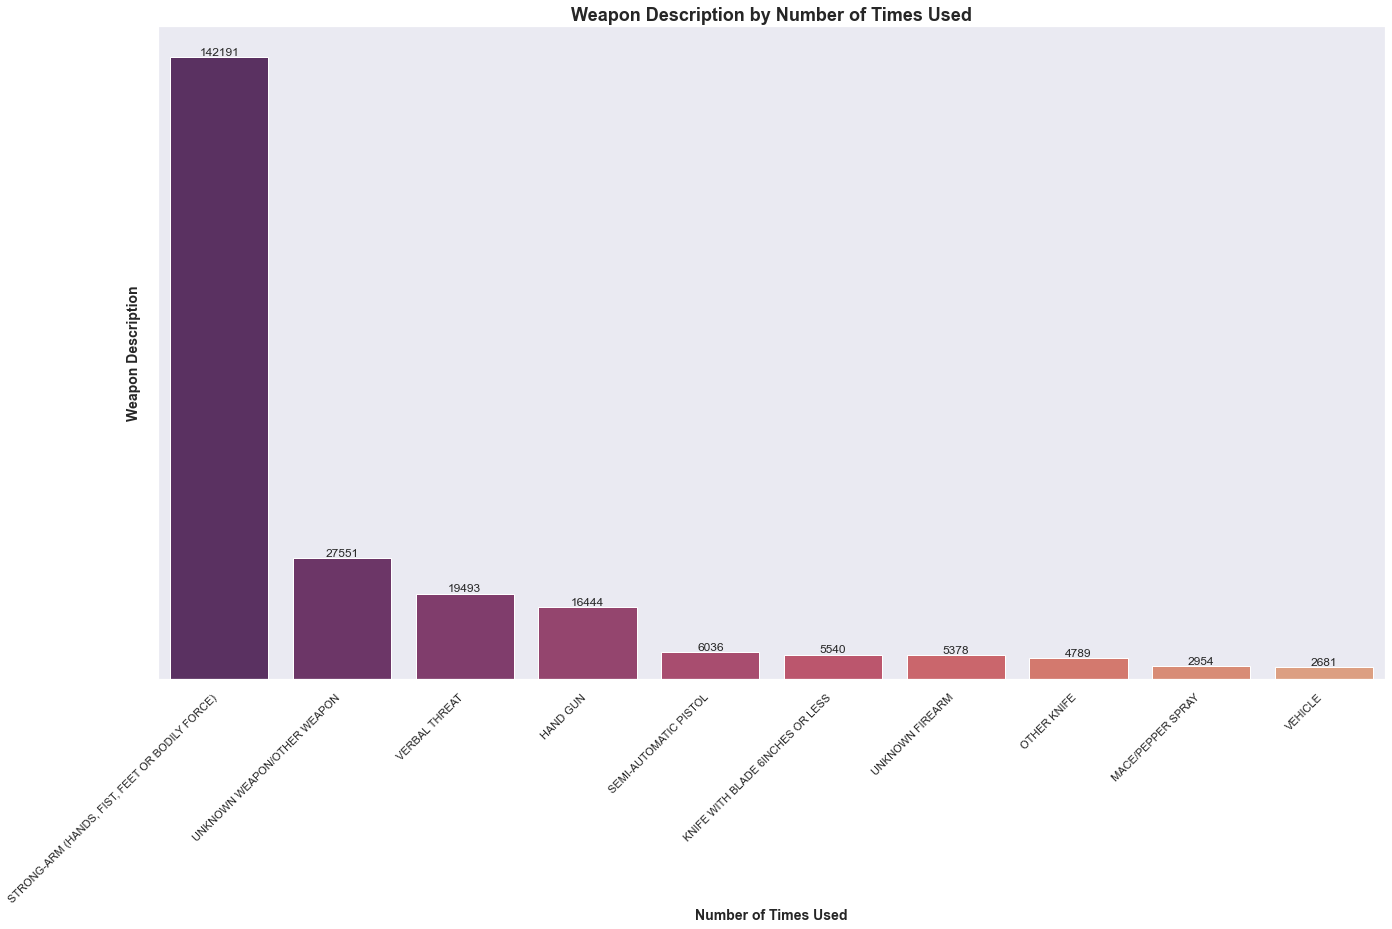

In [39]:
plt.figure(figsize=(22,12))
sns.barplot(x='Weapon Description', y='Number of Times Used', data=df_crime_weapon, palette='flare_r')
plt.title('Weapon Description by Number of Times Used', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Number of Times Used', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Weapon Description', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.xticks(rotation=45, ha='right')
plt.gca().set_yticklabels([])
#plt.tight_layout()
for index, value in enumerate(df_crime_weapon['Number of Times Used']):
    plt.text(index, value, str(value), ha='center', va='bottom')

Strong arm (hands, fist, feet or bodily force) is by far the weapon used the most in carrying out crimes in Los Angeles within the considered period. 

### The premise most crimes were committed

#### Is there a particular premise that is of interest to attackers in carrying out crimes? Do they feel more safe in committing crimes in some location than the other?

In [40]:
df_crime_premise = df_crime['Premise Description'].value_counts()
df_crime_premise = pd.DataFrame(df_crime_premise).reset_index()
df_crime_premise = df_crime_premise.rename(columns={'index':'Premise Description',
                                              'Premise Description':'Number of Occurence'})
df_crime_premise = df_crime_premise.head(10)
df_crime_premise

,Premise Description,Number of Occurence
0,STREET,191718
1,SINGLE FAMILY DWELLING,129348
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",93710
3,PARKING LOT,53878
4,OTHER BUSINESS,35570
5,SIDEWALK,32943
6,"VEHICLE, PASSENGER/TRUCK",22838
7,GARAGE/CARPORT,15355
8,DRIVEWAY,12734
9,RESTAURANT/FAST FOOD,9669


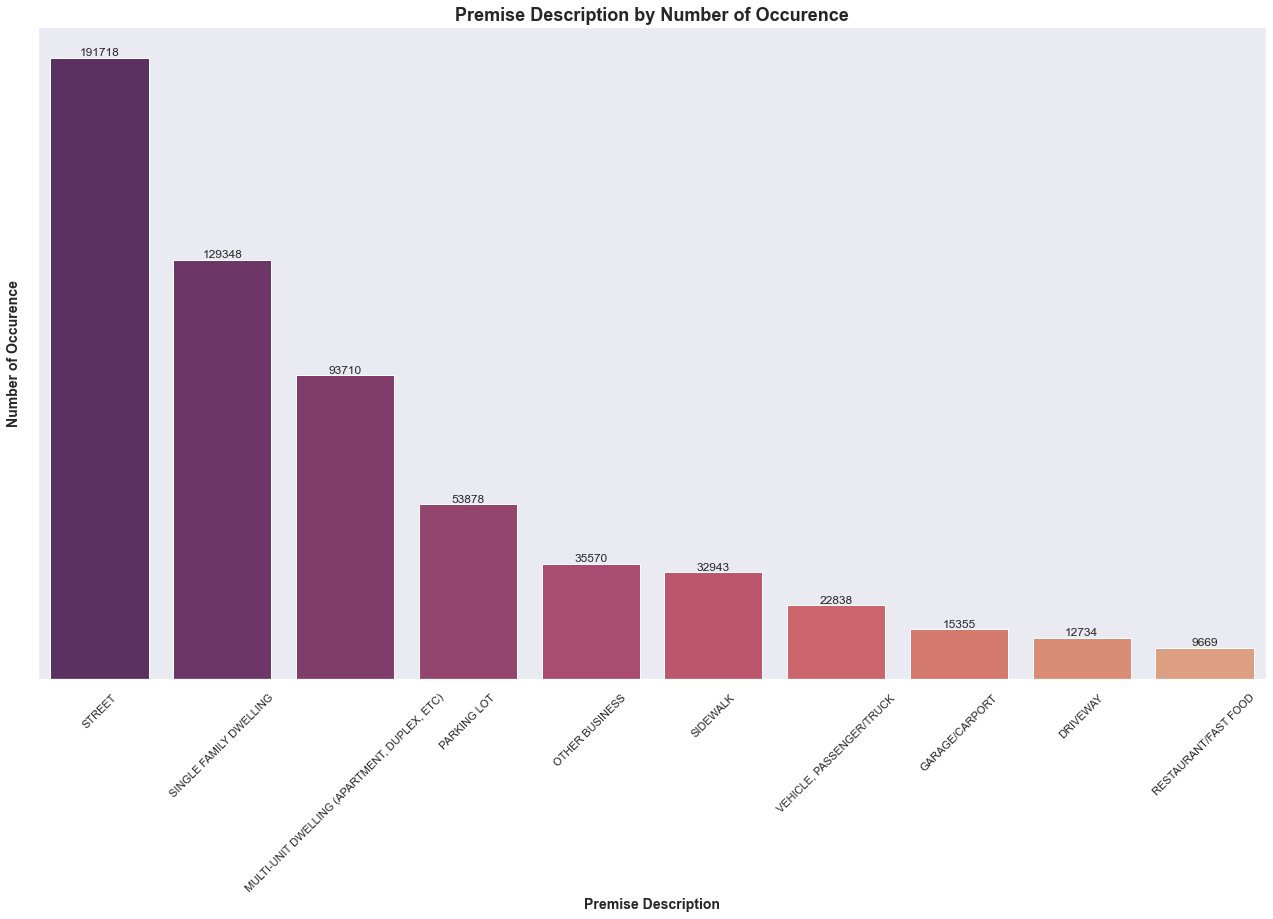

In [41]:
plt.figure(figsize=(22,12))
sns.barplot(x='Premise Description', y='Number of Occurence', data=df_crime_premise, palette='flare_r')
plt.title('Premise Description by Number of Occurence', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Premise Description', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Number of Occurence', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.xticks(rotation=45)
plt.gca().set_yticklabels([])
for index, value in enumerate(df_crime_premise['Number of Occurence']):
    plt.text(index, value, str(value), ha='center', va='bottom')

Most crimes were committed on the Street.